In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import linear_model
from sklearn.impute import SimpleImputer

# 1) Linear Regression from 'The Data Set'

In [177]:
df = pd.read_csv("../Data_CSVs/Cleaned_Official_Data.csv")
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,No Education,NaN
1,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,No Education,NaN
2,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,No Education,NaN
3,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,No Education,NaN
4,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,No Education,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41499,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,No Education,NaN
41500,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,No Education,NaN
41501,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,No Education,NaN
41502,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,No Education,NaN


In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [179]:
df['company'] = le.fit_transform(df['company'])

In [180]:
df['gender'] = le.fit_transform(df['gender'])

In [181]:
df['location'] = le.fit_transform(df['location'])

In [182]:
df['Education_Level'] = le.fit_transform(df['Education_Level'])

In [183]:
df['Race'] = le.fit_transform(df['Race'])

In [184]:
df['title'] = le.fit_transform(df['title'])

In [185]:
new_df = df
new_df.to_csv('Cleaned_Official_Data_New.csv', index= False)

In [186]:
new_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,472,11,140000,729,4.0,4.0,130000,0.0,10000.0,1,4,5
1,61,11,172000,748,12.0,2.0,142000,30000.0,0.0,1,4,5
2,1183,11,325000,718,7.0,2.0,161000,140000.0,25000.0,1,4,5
3,762,11,150000,748,4.0,0.0,118000,5000.0,12000.0,1,4,5
4,517,11,640000,537,11.0,4.0,210000,380000.0,50000.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
41499,61,11,135000,748,1.0,0.0,104000,3000.0,18500.0,1,4,5
41500,61,11,350000,47,14.0,1.0,160000,175000.0,56250.0,1,4,5
41501,762,8,305000,748,20.0,2.0,200000,75000.0,30000.0,0,4,5
41502,61,11,152000,748,3.0,0.0,106000,26000.0,20000.0,1,4,5


An attempt at a linear regression model for predicting salary based on company, total yearly compensation, years of experience, and gender. 

In [187]:
salary_data = new_df[['company', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'gender']]

In [188]:
salary_data

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender
0,472,140000,4.0,4.0,1
1,61,172000,12.0,2.0,1
2,1183,325000,7.0,2.0,1
3,762,150000,4.0,0.0,1
4,517,640000,11.0,4.0,1
...,...,...,...,...,...
41499,61,135000,1.0,0.0,1
41500,61,350000,14.0,1.0,1
41501,762,305000,20.0,2.0,0
41502,61,152000,3.0,0.0,1


In [189]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(salary_data[['company', 'yearsofexperience', 'yearsatcompany','gender']], salary_data['totalyearlycompensation'], test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (33203, 4)
Testing set shape: (8301, 4)


In [190]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [  -17.46709708  8978.95944826 -2728.90714427  7152.4344075 ]
Intercept: 151902.25455077185


In [191]:
# Create a new input data point
new_data = [[61, 5, 1, 0]]

# Make a salary prediction using the trained model
prediction = model.predict(new_data)

# Print the predicted salary
print("Predicted salary:", prediction)


Predicted salary: [193002.65172574]


/home/pragna/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [192]:
score = model.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.16156763290522336


<function matplotlib.pyplot.show(close=None, block=None)>

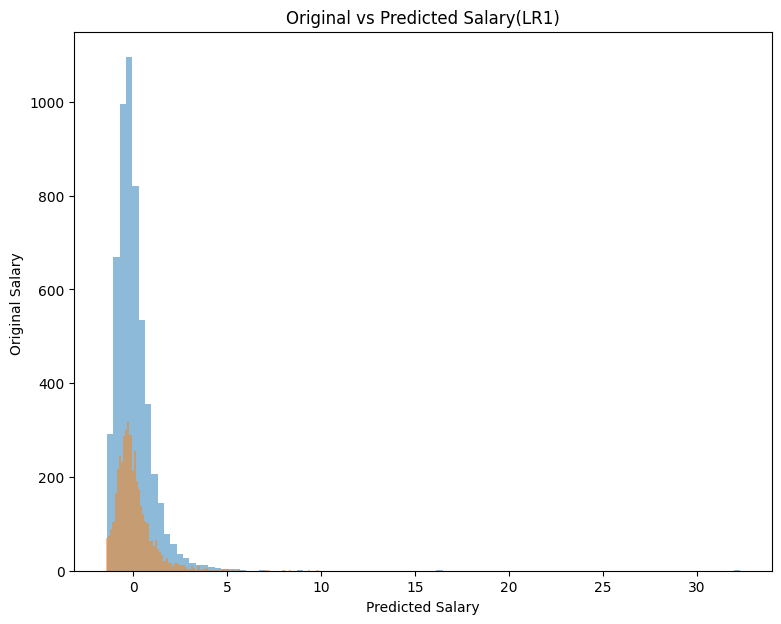

In [229]:
plt.figure(figsize=(9,7))
plt.hist(y_test,bins = 100, alpha=0.5)
plt.hist(y_pred, bins = 100, alpha=0.5)
plt.xlabel('Predicted Salary')
plt.ylabel('Original Salary ')
plt.title('Original vs Predicted Salary(LR1)')
plt.show

# 2) Linear Regression Model of Normalized Set

In [196]:
real_df = pd.read_csv('../Data_CSVs/Real_Data.csv')
real_df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.143430,0.054564,0.447007,1.517822,1.065329,-0.363612,0.689104,-0.533509,1.329823,1.379429,...,4.726695,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,1.754538
1,0.471923,-1.595458,0.447007,-0.465347,0.569680,-0.705530,-0.212300,-0.611236,-0.172942,-0.606353,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,5.215915,-0.178149,-0.227948,0.718519,-0.941343
2,-0.143430,0.009894,0.447007,1.044566,0.754969,-0.192653,0.989572,-0.241446,0.753181,1.103626,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
3,0.471923,-1.592666,0.447007,0.180685,0.880039,-0.534571,0.388636,-1.482715,0.526019,-0.096117,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
4,-1.064986,-0.336304,0.447007,-0.082235,0.768866,-0.363612,-0.813236,-0.241446,0.543493,-0.316760,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,-0.941343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21516,-0.370138,0.272334,0.746790,9.555667,-0.055671,0.320223,1.290039,-0.241446,2.727743,-0.604974,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
21517,-0.143430,-0.079448,-0.452342,32.317043,0.768866,2.200769,3.393315,-0.900944,5.523583,-0.569119,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
21518,1.841008,0.107611,0.746790,10.569788,-1.153509,1.516934,-0.212300,-0.241446,2.028783,-0.602147,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,0.855911
21519,-0.370138,-1.017532,0.746790,16.331496,-0.055671,2.542687,-0.212300,0.222558,3.164593,-0.593486,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,-0.191721,5.613293,-0.227948,-0.352491,0.855911


In [197]:
y= real_df ['totalyearlycompensation']
X = real_df.drop(columns= ['totalyearlycompensation'])


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


In [199]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16140, 5381, 16140, 5381)

In [200]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

Coefficients: [-8.64111965e-04 -2.48583095e-03 -7.12886413e-04 -1.95090382e-03
  1.24341787e-03 -4.15704507e-03  7.43204011e-04  4.46643998e-01
  5.31397124e-01  2.06517556e-01  1.48052851e-04 -2.61322213e-04
  2.15013258e-04 -4.93830986e-03  2.88969891e-03  4.15635974e+08
  3.03084503e-03  2.55708892e+08  4.93491409e+07  2.09642519e+08
  8.55130964e+10 -8.20061110e+10 -1.58397554e+10  1.47900344e+10
 -1.75997507e-03  1.59952998e+11 -4.68402179e+08]
Intercept: -0.001268523813789228


In [201]:
score = model1.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.8158220048375913


In [202]:
y_pred=model1.predict(X_test)
y_pred=y_pred.reshape(-1,1)
y_pred.shape

(5381, 1)

In [203]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.027245777783730527
0.19279720015777918
0.4390867797574634


<function matplotlib.pyplot.show(close=None, block=None)>

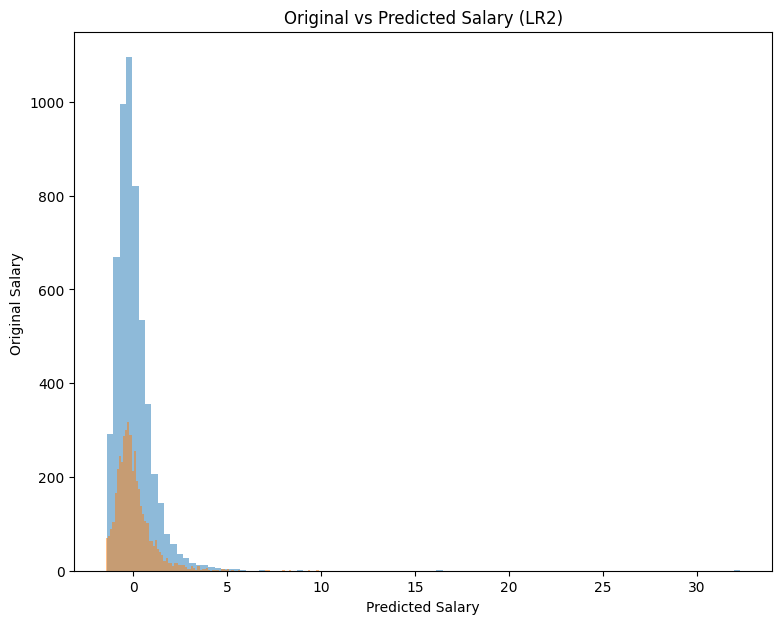

In [230]:
plt.figure(figsize=(9,7))
plt.hist(y_test,bins = 100, alpha = 0.5)
plt.hist(y_pred, bins = 100, alpha = 0.5)
plt.xlabel('Predicted Salary')
plt.ylabel('Original Salary ')
plt.title('Original vs Predicted Salary (LR2)')
plt.show

# 3) Linear Regression Model of Pre-Trained Sets

In [205]:
test_df = pd.read_csv("../Data_CSVs/Salary_Test_Set.csv")

In [206]:
train_df = pd.read_csv("../Data_CSVs/Salary_Train_Set.csv")

In [207]:
train_df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.045548,-0.759836,-0.321796,-0.531203,-0.753857,0.493300,-0.513635,-1.715145,-0.593020,-0.445377,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.608246,0.617166
1,-0.045545,0.500659,1.203586,0.693643,0.340188,1.177309,0.393344,0.908085,1.138245,0.328726,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.610736,0.616281
2,-0.782808,0.226649,0.940086,0.019203,-0.298203,1.861317,3.718931,1.570660,0.666082,-0.487601,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609365,0.616768
3,-1.000090,-1.049739,-0.321878,-0.290885,0.370300,0.151296,-0.513635,-0.522242,0.193919,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.608734,-0.804618
4,0.270870,0.369506,-0.321660,-0.926565,-1.884482,-0.361711,-0.211309,0.706508,-1.677246,-0.065363,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.607442,-0.804235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17211,0.485892,0.392444,-0.322065,0.251768,1.013505,-0.874717,-0.211309,0.704689,0.456232,0.019085,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609837,0.616600
17212,0.617358,-0.537230,-0.321524,-1.321927,-2.226499,-1.045720,-0.513635,1.797509,-1.957046,-0.515750,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.606638,0.617737
17213,-0.942768,0.060855,-0.321711,-0.779273,-0.243099,-0.532713,0.393344,-0.521554,-0.872820,-0.628347,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.162428,-0.804324
17214,0.933828,0.367094,-0.322402,1.236297,1.295946,-0.361711,-0.815961,-0.353475,1.103270,0.919859,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,-0.178569,4.415341,-0.740163,-0.805537


In [208]:
test_df

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.240131,-1.030103,-0.321949,-0.245486,-1.216722,-0.815961,0.096080,-0.243269,-0.065363,0.466359,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,5.600081,-0.226483,-2.942643,-0.804701
1,-0.733273,-0.633257,-0.321949,-0.017478,-0.361711,0.695670,-0.345440,-1.012720,-0.628347,-0.460545,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
2,-0.163603,1.595756,0.340632,0.528209,1.690315,2.207300,0.661833,0.543669,0.525771,0.264858,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
3,-1.134903,-0.181501,-0.321949,-0.674020,-1.216722,-0.815961,-0.772836,-1.012720,-0.628347,-0.662046,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,-0.804701
4,-0.682587,-0.181501,-0.321949,0.232071,-0.532713,0.393344,0.704805,0.019044,-0.628347,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1.038966,0.109982,-0.321949,1.193007,-0.874717,-0.211309,-0.022566,0.281356,0.230204,-0.299344,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4301,-0.920588,-1.168249,-0.321949,-0.887131,-0.874717,-0.211309,-0.022566,-0.960257,-0.628347,-0.742646,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
4302,-0.128182,0.413470,-0.321949,-0.887131,-0.361711,-0.815961,0.704805,0.106481,-0.501675,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4303,-0.999936,-0.988522,-0.321949,0.178605,1.348311,2.207300,0.704805,0.263869,-0.206109,0.143958,...,-0.211779,-0.119153,7.877961,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,0.462117


In [233]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_df,train_df['totalyearlycompensation'])


In [234]:
len(X_train1), len(X_test1), len(y_train1), len(y_test1)

(12912, 4304, 12912, 4304)

In [235]:
X_train1.shape

(12912, 28)

In [236]:
y_train1.shape

(12912,)

In [237]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(X_train1, y_train1)

# Print the coefficients and intercept of the model
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

Coefficients: [ 3.84912758e-17  1.11022302e-16 -1.67907732e-16  1.00000000e+00
 -1.12750118e-16  1.58609396e-16 -7.05734459e-17 -7.03686194e-17
 -4.11283639e-16 -2.73394833e-16 -4.00849118e-16  6.94053718e-17
 -7.90016686e-17  7.61001726e-17  4.23624140e-17 -3.96485087e-18
  5.41457640e-16  7.23379689e-16  2.70616862e-16  1.61762964e-16
  1.68051337e-16 -6.66133815e-16 -6.95624114e-16 -2.16406754e-16
 -6.72205347e-17 -2.87096735e-16  3.29597460e-16  1.14491749e-16]
Intercept: 2.168404344971009e-19


In [238]:
score = model1.score(X_test1, y_test1)
print("R-squared:", score)

R-squared: 1.0


In [239]:
y_pred=model1.predict(X_test1)
y_pred1=y_pred.reshape(-1,1)
y_pred1.shape

(4304, 1)

In [216]:
from sklearn import metrics

In [217]:
print(metrics.mean_absolute_error(y_test1, y_pred))
print(metrics.mean_squared_error(y_test1, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

#model1.score(y_test1, y_pred1)

6.27603123590979e-16
7.491216950235053e-31
8.6551816562305925e-16


<function matplotlib.pyplot.show(close=None, block=None)>

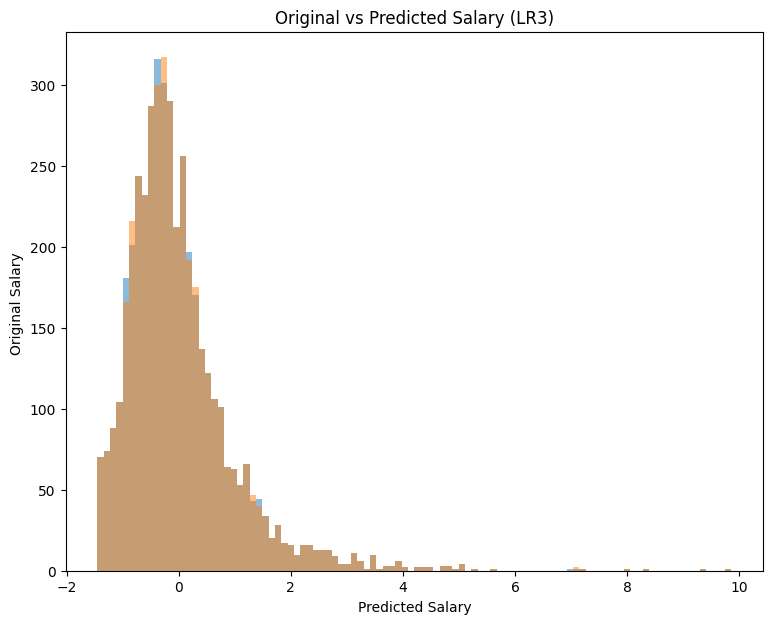

In [231]:
plt.figure(figsize=(9,7))
plt.hist(y_test1,bins = 100, alpha = 0.5)
plt.hist(y_pred1, bins = 100, alpha = 0.5)
plt.xlabel('Predicted Salary')
plt.ylabel('Original Salary ')
plt.title('Original vs Predicted Salary (LR3)')
plt.show